## 4주차 1일차

분류문제

In [1]:
import pandas as pd

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [2]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red['type']=0
white['type']=1

print(red.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]


In [4]:
wine=pd.concat([red,white])

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


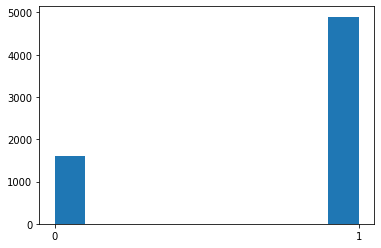

1    4898
0    1599
Name: type, dtype: int64


In [6]:
import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts()) # 1인(white인) 데이터가 많은 것을 확인 가능

In [7]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [8]:
#분류의 Data Normalization부분 매우 중요!

wine_norm=(wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [9]:
import numpy as np 

wine_shuffle = wine_norm.sample(frac=1) # 데이터를 섞기 위해서 사용(1은 100%)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy() # array형식으로 바꾸기
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
3250       0.239669          0.033333     0.271084  ...  0.478261  0.500000   1.0
472        0.231405          0.106667     0.174699  ...  0.652174  0.500000   1.0
535        0.438017          0.093333     0.144578  ...  0.333333  0.500000   0.0
832        0.289256          0.146667     0.204819  ...  0.695652  0.833333   1.0
2165       0.264463          0.180000     0.186747  ...  0.202899  0.333333   1.0

[5 rows x 13 columns]
[[0.23966942 0.03333333 0.27108434 0.05521472 0.05647841 0.17708333
  0.28801843 0.08694814 0.26356589 0.17977528 0.47826087 0.5
  1.        ]
 [0.23140496 0.10666667 0.1746988  0.02147239 0.02325581 0.0625
  0.1843318  0.05571621 0.41085271 0.12921348 0.65217391 0.5
  1.        ]
 [0.43801653 0.09333333 0.14457831 0.02300613 0.11461794 0.
  0.05069124 0.22922691 0.53488372 0.36516854 0.33333333 0.5
  0.        ]
 [0.2892562  0.14666667 0.20481928 0.03220859 0.05813953 0.11458333


In [10]:
import tensorflow as tf

train_idx=int(len(wine_np) * 0.8)
print(train_idx)

#와인 데이터 세트 전체 인덱스 확인
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]#학습 데이터 X/Y 분할
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1] #테스트 데이터 X/Y 분할
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2) #학습 데이터 원-핫-인코딩
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2) #테스트 데이터 원-핫-인코딩
# 정답 클래스 개수 = num_classes
print(train_Y[0])
print(test_Y[0])

5197
[0. 1.]
[1. 0.]


In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
                             tf.keras.layers.Dense(units=24,activation='relu'),
                             tf.keras.layers.Dense(units=12,activation='relu'),
                             tf.keras.layers.Dense(units=2,activation='softmax')
])

#softmax는 분류 문제나 RNN에서의 다음 토큰 예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결과값으로 확률이 필요한 다양한 분야에 사용


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#앤트로피: 확률의 역수에 로그를 취한 값 -> 불확실한 정보로 숫자로 정량화
# -> 확률의 역수를 취해주는 이유는 확률이 높은 사건일수록 정보량이 적다고 판단
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#model.evaluate(test_X, test_Y)

Epoch 1/25
122/122 [==============================] - 1s 6ms/step - loss: 0.2641 - accuracy: 0.8686 - val_loss: 0.0558 - val_accuracy: 0.9831
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9804 - val_loss: 0.0475 - val_accuracy: 0.9862
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9885 - val_loss: 0.1334 - val_accuracy: 0.9585
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9900 - val_loss: 0.1079 - val_accuracy: 0.9615
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9858 - val_loss: 0.1044 - val_accuracy: 0.9692
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9830 - val_loss: 0.0469 - val_accuracy: 0.9877
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9910 - val_loss: 0.0485 - val_accuracy: 0.9838
Epoch 

In [14]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9946


[0.03580370917916298, 0.994615375995636]

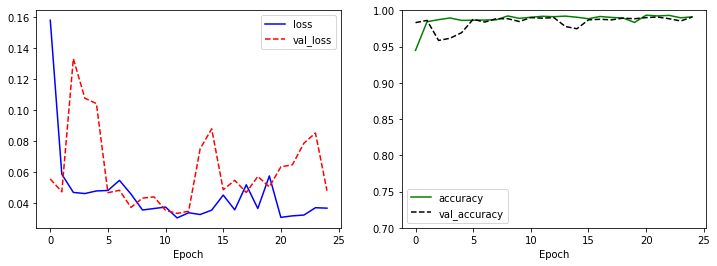

In [15]:
#분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4)) #시각화 크기 지정
plt.subplot(1, 2, 1) #시각화 구역을 설정
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()#범례
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()
#조금 loss가 튀는 경향이 있긴함